In [58]:
# import the library
# kernel must be [conda env:gl-env]
import graphlab as gl

In [95]:
import os
import urllib

## Download file if it does not exist
if not os.path.isfile('../data/song_data.csv'):
    print('Downloading song_data.csv...')
    %time urllib.urlretrieve('https://static.turi.com/datasets/millionsong/song_data.csv', '../data/song_data.csv')
if not os.path.isfile('../data/10000.txt'):
    print('Downloading 10000.txt...')
    %time urllib.urlretrieve('https://static.turi.com/datasets/millionsong/10000.txt', '../data/10000.txt')

##  Import data for the songs
songs = gl.SFrame.read_csv("../data/song_data.csv")

CPU times: user 633 ms, sys: 1.28 s, total: 1.91 s
Wall time: 50.1 s


Finished parsing file /Users/kjprice/Library/Projects/smu/data-mining/DataMiningProject/data/song_data.csv

Parsing completed. Parsed 100 lines in 0.854651 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 637410 lines. Lines per second: 488154

Finished parsing file /Users/kjprice/Library/Projects/smu/data-mining/DataMiningProject/data/song_data.csv

Parsing completed. Parsed 1000000 lines in 1.65844 secs.

In [60]:
# Import the data for the plays per user per song
usage_data = gl.SFrame.read_csv("data/10000.txt",
                                header=False,
                                delimiter='\t',
                                column_type_hints={'X3':int})

Finished parsing file https://static.turi.com/datasets/millionsong/10000.txt

Parsing completed. Parsed 100 lines in 0.750319 secs.

Finished parsing file https://static.turi.com/datasets/millionsong/10000.txt

Parsing completed. Parsed 2000000 lines in 1.51628 secs.

In [61]:
# Review the header of the song data
songs.head()

song_id,title,release,artist_name,year
SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze PresentsWinter Sessions ...,Der Mystic,0
SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor""Sinfonie ...",Berwald: Symphonies Nos.1/2/3/4 ...,David Montgomery,0
SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
SOJCFMH12A8C13B0C2,Mama_ mama can't you see? ...,March to cadence with theUS marines ...,The Sun Harbor's Chorus-Documentary Recordings ...,0


In [62]:
#Review data for the usage.   
usage_data

X1,X2,X3
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1


In [63]:
# Change data labels to be human readable 
usage_data.rename({'X1':'user', 'X2': 'song', 'X3': 'plays'})

user,song,plays
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1


### Want to add code to change the song to the name from the song data & perhaps change user information to something less complex (new user ID)

In [64]:
#recommendation model

model = gl.recommender.create(usage_data, user_id = "user", item_id="song", target = "plays")
results = model.recommend(users=None, k=5)
model.save("my_model")

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 2000000 observations with 76353 users and 10000 items.

Data prepared in: 1.67717s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 250000 / 2000000 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 66.3522                                  |

| 6       | 0.012207          | 82.1098                                  |

| 7       | 0.00610352        | 88.0911                                  |

| 8       | 0.00305176        | 91.7769                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 66.3522                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 98us         | 84.873            | 6.57972               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 981.697ms    | DIVERGED          | DIVERGED              | 0.0244141   |

| RESET   | 1.31s        | 84.8729           | 6.57971               |             |

| 1       | 2.00s        | 73.7047           | 6.78374               | 0.012207    |

| 2       | 2.70s        | 67.3114           | 6.49439               | 0.00725834  |

| 3       | 3.37s        | 58.3965           | 5.74703               | 0.00535512  |

| 4       | 4.15s        | 51.6258           | 5.25518               | 0.00431584  |

| 5       | 4.85s        | 46.833            | 4.87732               | 0.00365075  |

| 6       | 5.55s        | 43.3652           | 4.59314               | 0.00318417  |

| 9       | 7.59s        | 37.3199           | 4.10753               | 0.00234924  |

| 11      | 9.05s        | 34.9907           | 3.92824               | 0.002021    |

| 14      | 11.38s       | 32.6564           | 3.75215               | 0.00168661  |

| 19      | 15.60s       | 29.9988           | 3.54788               | 0.00134136  |

| 24      | 19.02s       | 28.1765           | 3.39198               | 0.00112578  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 26.4991

Final training RMSE: 3.14462

recommendations finished on 1000/76353 queries. users per second: 31907.1

recommendations finished on 2000/76353 queries. users per second: 31406.5

recommendations finished on 3000/76353 queries. users per second: 29348.5

recommendations finished on 4000/76353 queries. users per second: 28844.4

recommendations finished on 5000/76353 queries. users per second: 29349.1

recommendations finished on 6000/76353 queries. users per second: 29654.4

recommendations finished on 7000/76353 queries. users per second: 29897.5

recommendations finished on 8000/76353 queries. users per second: 30083.9

recommendations finished on 9000/76353 queries. users per second: 30237.8

recommendations finished on 10000/76353 queries. users per second: 30393.7

recommendations finished on 11000/76353 queries. users per second: 30524.4

recommendations finished on 12000/76353 queries. users per second: 30487.3

recommendations finished on 13000/76353 queries. users per second: 30176.8

recommendations finished on 14000/76353 queries. users per second: 29821.9

recommendations finished on 15000/76353 queries. users per second: 29650.9

recommendations finished on 16000/76353 queries. users per second: 29496.2

recommendations finished on 17000/76353 queries. users per second: 29417.4

recommendations finished on 18000/76353 queries. users per second: 29527.7

recommendations finished on 19000/76353 queries. users per second: 29553.5

recommendations finished on 20000/76353 queries. users per second: 29654.1

recommendations finished on 21000/76353 queries. users per second: 29737.8

recommendations finished on 22000/76353 queries. users per second: 29761.3

recommendations finished on 23000/76353 queries. users per second: 29506.7

recommendations finished on 24000/76353 queries. users per second: 29525.3

recommendations finished on 25000/76353 queries. users per second: 29482.9

recommendations finished on 26000/76353 queries. users per second: 29521

recommendations finished on 27000/76353 queries. users per second: 29583.4

recommendations finished on 28000/76353 queries. users per second: 29657.8

recommendations finished on 29000/76353 queries. users per second: 29506.6

recommendations finished on 30000/76353 queries. users per second: 29563.2

recommendations finished on 31000/76353 queries. users per second: 29621.9

recommendations finished on 32000/76353 queries. users per second: 29650.1

recommendations finished on 33000/76353 queries. users per second: 29620.9

recommendations finished on 34000/76353 queries. users per second: 29666

recommendations finished on 35000/76353 queries. users per second: 29666

recommendations finished on 36000/76353 queries. users per second: 29693.5

recommendations finished on 37000/76353 queries. users per second: 29711.5

recommendations finished on 38000/76353 queries. users per second: 29781.2

recommendations finished on 39000/76353 queries. users per second: 29797.4

recommendations finished on 40000/76353 queries. users per second: 29844.7

recommendations finished on 41000/76353 queries. users per second: 29863.6

recommendations finished on 42000/76353 queries. users per second: 29886

recommendations finished on 43000/76353 queries. users per second: 29919.2

recommendations finished on 44000/76353 queries. users per second: 29957

recommendations finished on 45000/76353 queries. users per second: 29944.5

recommendations finished on 46000/76353 queries. users per second: 29968.9

recommendations finished on 47000/76353 queries. users per second: 29971.6

recommendations finished on 48000/76353 queries. users per second: 29958.5

recommendations finished on 49000/76353 queries. users per second: 29971.2

recommendations finished on 50000/76353 queries. users per second: 29991.5

recommendations finished on 51000/76353 queries. users per second: 30026.8

recommendations finished on 52000/76353 queries. users per second: 30046.7

recommendations finished on 53000/76353 queries. users per second: 30029.9

recommendations finished on 54000/76353 queries. users per second: 30045.8

recommendations finished on 55000/76353 queries. users per second: 30070.6

recommendations finished on 56000/76353 queries. users per second: 30093

recommendations finished on 57000/76353 queries. users per second: 30126.8

recommendations finished on 58000/76353 queries. users per second: 30024.6

recommendations finished on 59000/76353 queries. users per second: 30052.8

recommendations finished on 60000/76353 queries. users per second: 30062.1

recommendations finished on 61000/76353 queries. users per second: 30082.2

recommendations finished on 62000/76353 queries. users per second: 30104.6

recommendations finished on 63000/76353 queries. users per second: 30114.1

recommendations finished on 64000/76353 queries. users per second: 30136.7

recommendations finished on 65000/76353 queries. users per second: 30161.8

recommendations finished on 66000/76353 queries. users per second: 30163.2

recommendations finished on 67000/76353 queries. users per second: 30187.2

recommendations finished on 68000/76353 queries. users per second: 30207.3

recommendations finished on 69000/76353 queries. users per second: 30206.4

recommendations finished on 70000/76353 queries. users per second: 30224.8

recommendations finished on 71000/76353 queries. users per second: 30230.2

recommendations finished on 72000/76353 queries. users per second: 30232.3

recommendations finished on 73000/76353 queries. users per second: 30234

recommendations finished on 74000/76353 queries. users per second: 30228

recommendations finished on 75000/76353 queries. users per second: 30192.6

recommendations finished on 76000/76353 queries. users per second: 30070

In [65]:
results # the recommendation output

user,song,score,rank
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOVMWUC12A8C13750B,11.7303466368,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOZQSVB12A8C13C271,9.1632327605,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOXCCPU12A58A7BF1E,7.17326732166,3
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOSJRJP12A6D4F826F,6.68285604007,4
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHALKJ12AB017FCC2,6.56744666583,5
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSXLTC12AF72A7F54,1.62822329625,1
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOLRGVL12A8C143BC3,0.89879476651,2
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOBONKR12A58A7A7E0,0.78990971669,3
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOEGIYH12A6D4FC0E3,0.610860224807,4
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSKDTM12A6701C795,0.459320899093,5


In [66]:
results[300:310]

user,song,score,rank
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOBONKR12A58A7A7E0,7.81336181051,1
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOMZVGZ12A8C140EFF,3.20124070532,2
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOSXLTC12AF72A7F54,2.79158322699,3
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOMMYNX12A58A7D9A6,2.00135295279,4
fe979a7b199de3ee8a78486c10e5ed13587fc359 ...,SOYYIMV12A8C13E4ED,1.86722581274,5
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOFCPOU12A8C13BF40,7.38839550502,1
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOHXBXX12B34F2609B,5.1230794955,2
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SONQCXC12A6D4F6A37,5.05139322765,3
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOXXVSU12A8C133445,4.96390409953,4
732f88be38fae217f8ab7e24c20dd072436e3e40 ...,SOVPSKL12A670206B9,4.56959410197,5


Above shows the top 5 ratings for each user

In [67]:
usage_data.head()

user,song,plays
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1


In [68]:
results

user,song,score,rank
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOVMWUC12A8C13750B,11.7303466368,1
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOZQSVB12A8C13C271,9.1632327605,2
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOXCCPU12A58A7BF1E,7.17326732166,3
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOSJRJP12A6D4F826F,6.68285604007,4
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHALKJ12AB017FCC2,6.56744666583,5
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSXLTC12AF72A7F54,1.62822329625,1
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOLRGVL12A8C143BC3,0.89879476651,2
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOBONKR12A58A7A7E0,0.78990971669,3
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOEGIYH12A6D4FC0E3,0.610860224807,4
85c1f87fea955d09b4bec2e36aee110927aedf9a ...,SOSKDTM12A6701C795,0.459320899093,5


In [69]:
item_item = gl.recommender.item_similarity_recommender.create(usage_data,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays",
                                                             only_top_k=3,
                                                             similarity_type="cosine")

results = item_item.get_similar_items(k=3)
results.head

Recsys training: model = item_similarity

Preparing data set.

Data has 2000000 observations with 76353 users and 10000 items.

Data prepared in: 1.71924s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.513ms                        | 3.75       |

| 53.891ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 290.591ms                           | 0                | 0               |

| 1.42s                               | 100              | 10000           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.50263s

<bound method SFrame.head of Columns:
	song	str
	similar	str
	score	float
	rank	int

Rows: 29995

Data:
+--------------------+--------------------+----------------+------+
|        song        |      similar       |     score      | rank |
+--------------------+--------------------+----------------+------+
| SOAKIMP12A8C130995 | SOYHEPA12A8C13097F | 0.768602848053 |  1   |
| SOAKIMP12A8C130995 | SOOQJRN12A6310EDC0 | 0.599323928356 |  2   |
| SOAKIMP12A8C130995 | SOIJHHU12AF7299A88 | 0.581352412701 |  3   |
| SOBBMDR12A8C13253B | SORUKVE12A8C13D623 | 0.168111920357 |  1   |
| SOBBMDR12A8C13253B | SOJGZFQ12AF72A41B2 | 0.165343284607 |  2   |
| SOBBMDR12A8C13253B | SOSNSUE12A6D4F58F8 | 0.163988471031 |  3   |
| SOBXHDL12A81C204C0 | SOMLMKI12A81C204BC | 0.191700100899 |  1   |
| SOBXHDL12A81C204C0 | SODCRAR12A8C140C43 | 0.182167172432 |  2   |
| SOBXHDL12A81C204C0 | SOGKGLB12A81C22AFA | 0.178512811661 |  3   |
| SOBYHAJ12A6701BF1D | SOMYECL12A6701D9C8 | 0.707705914974 |  1   |
+-----------

In [70]:
#Break the data - train test - by user:  80% to train.  20% to test.   limit to 100 user for the real time for this example
train, test = gl.recommender.util.random_split_by_user(usage_data,
                                                      user_id="user", item_id="song",
                                                      max_num_users=100, item_test_proportion=0.2)

In [71]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

item_item = gl.recommender.item_similarity_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays",
                                                             only_top_k=5,
                                                             similarity_type="cosine")

rmse_results = item_item.evaluate(test)


Recsys training: model = item_similarity

Preparing data set.

Data has 1999493 observations with 76352 users and 10000 items.

Data prepared in: 1.68972s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.598ms                        | 1.25       |

| 54.242ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 278.382ms                           | 0                | 0               |

| 1.41s                               | 100              | 10000           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.49317s


Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.129411764706 | 0.0303271864301 |
|   2    |  0.152941176471 | 0.0781308533514 |
|   3    |  0.133333333333 | 0.0942955356191 |
|   4    |  0.120588235294 |  0.108934891361 |
|   5    |  0.110588235294 |  0.117845955787 |
|   6    |  0.117647058824 |  0.149051060051 |
|   7    |  0.119327731092 |  0.169498496601 |
|   8    |  0.110294117647 |   0.1833796046  |
|   9    |  0.100653594771 |  0.195614898718 |
|   10   | 0.0964705882353 |  0.210573504382 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 8.128007804914494)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
| 9286c56721b756b946831dd2dc.

In [72]:
#print rmse_results ('rmse_by_item')
print rmse_results.viewkeys()


dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])


In [73]:
rmse_results['rmse_overall']

8.128007804914494

In [74]:
rmse_results['rmse_by_user']

user,count,rmse
14ada7e24d05e8e439c05aff145b37f0e19d7bf5 ...,1,5.0
58420f54d762870bad926d4ea11f731323e9e7d1 ...,8,18.6132321479
e45e416bd518a8f30159ec98062d955788ffb42e ...,4,8.7408612871
ecf15dbd69f0ed01d7f60175d3e81a54746c4ba8 ...,3,15.1986841536
4cd74e4ec0646f398d7bf0f6a0191959000df8fe ...,4,3.71043645323
d09998ab1e005de70028b0bac4dfd38c6686e81c ...,3,6.04734446685
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,7,2.60015971983
ab054f67e6ea697c34b72bc7d1611594c425f9cb ...,4,0.990388925805
1fdeb3410e30adac383104d1491f79bebf3f3214 ...,2,5.0
9286c56721b756b946831dd2dc95f23bedfa2321 ...,2,0.603194676892


In [75]:
rmse_results['rmse_by_item']

song,count,rmse
SOBSLVH12A8C131F38,1,2.98708958758
SOQIPYO12AAF3B5B1D,1,1.0
SOCKSGZ12A58A7CA4B,3,1.91417645334
SOWSADH12A6D4F3C8F,1,0.96722212765
SOGQANL12A6701E099,1,1.0
SOXPFLM12A8AE48C50,1,1.8379120764
SOTVHFG12AB018AC8F,1,1.0
SOFHAUU12A8C13FD74,1,0.984275290599
SOPIDWP12AB0184DFA,1,0.994869765262
SOPVATE12AB0181330,1,8.0


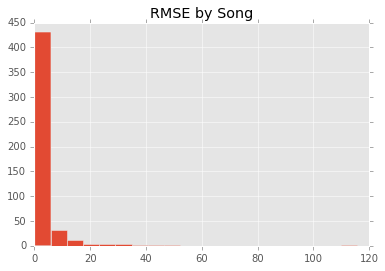

In [76]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_item']['rmse']

plt.hist(rmsevals, bins=20)
plt.title('RMSE by Song')
plt.show()

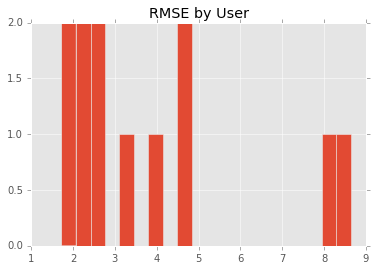

In [77]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']>10]


plt.hist(rmsevals, bins=20)
plt.title('RMSE by User')
plt.show()

In [78]:
rmse_results['rmse_by_user']

user,count,rmse
14ada7e24d05e8e439c05aff145b37f0e19d7bf5 ...,1,5.0
58420f54d762870bad926d4ea11f731323e9e7d1 ...,8,18.6132321479
e45e416bd518a8f30159ec98062d955788ffb42e ...,4,8.7408612871
ecf15dbd69f0ed01d7f60175d3e81a54746c4ba8 ...,3,15.1986841536
4cd74e4ec0646f398d7bf0f6a0191959000df8fe ...,4,3.71043645323
d09998ab1e005de70028b0bac4dfd38c6686e81c ...,3,6.04734446685
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,7,2.60015971983
ab054f67e6ea697c34b72bc7d1611594c425f9cb ...,4,0.990388925805
1fdeb3410e30adac383104d1491f79bebf3f3214 ...,2,5.0
9286c56721b756b946831dd2dc95f23bedfa2321 ...,2,0.603194676892


In [79]:
#looking at recall and precision
rmse_results['precision_recall_by_user']

user,cutoff,precision,recall,count
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,1,1.0,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,2,0.5,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,3,0.333333333333,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,4,0.25,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,5,0.2,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,6,0.166666666667,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,7,0.142857142857,0.142857142857,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,8,0.25,0.285714285714,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,9,0.222222222222,0.285714285714,7
01740cf51bb3016e39c2d8d1f44f1dcc7f165c78 ...,10,0.2,0.285714285714,7


In [80]:
#do the aggregate

import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [ agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group(group the restuls by 'k' which is the cutoff)
# the cutoff is the number of top items to look for 
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#

rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
16,0.0757352941176,0.094467410759,0.255901935755,0.295647837187
10,0.0964705882353,0.119259537859,0.210573504382,0.27978741153
36,0.0490196078431,0.0600542992655,0.322456813848,0.302750592492
26,0.0606334841629,0.0708892525885,0.307373603503,0.304668213784
41,0.0461979913917,0.0567424142063,0.340125536176,0.305139121266
3,0.133333333333,0.212054993484,0.0942955356191,0.207637771443
1,0.129411764706,0.335655120416,0.0303271864301,0.100138521443
6,0.117647058824,0.165334933207,0.149051060051,0.244851916924
11,0.0919786096257,0.114563378317,0.218514680853,0.28291809468
2,0.152941176471,0.26594481307,0.0781308533514,0.200844825426


## Cross Validated Collaborative Filtering

In [81]:
recl = gl.recommender.ranking_factorization_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays")

rmse_results = recl.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1999493 observations with 76352 users and 10000 items.

Data prepared in: 1.70136s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 249936 / 1999493 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 50.0179                                  |

| 6       | 0.012207          | 67.7989                                  |

| 7       | 0.00610352        | 73.1546                                  |

| 8       | 0.00305176        | 76.3058                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 50.0179                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 76us         | 84.8663           | 6.57946               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 957.816ms    | DIVERGED          | DIVERGED              | 0.0244141   |

| RESET   | 1.26s        | 84.8663           | 6.57946               |             |

| 1       | 1.95s        | 73.64             | 6.77946               | 0.012207    |

| 2       | 2.72s        | 67.5259           | 6.50654               | 0.00725834  |

| 3       | 3.42s        | 58.6732           | 5.76802               | 0.00535512  |

| 4       | 4.42s        | 51.7379           | 5.2641                | 0.00431584  |

| 5       | 5.27s        | 46.7896           | 4.86854               | 0.00365075  |

| 6       | 6.21s        | 43.5082           | 4.60355               | 0.00318417  |

| 9       | 8.77s        | 37.4576           | 4.12062               | 0.00234924  |

| 11      | 10.59s       | 35.1382           | 3.93717               | 0.002021    |

| 14      | 13.02s       | 32.6934           | 3.75507               | 0.00168661  |

| 19      | 16.82s       | 30.0013           | 3.54199               | 0.00134136  |

| 24      | 20.19s       | 28.3438           | 3.41574               | 0.00112578  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 26.5666

Final training RMSE: 3.15008


Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   1    | 0.0235294117647 | 0.0043137254902  |
|   2    | 0.0235294117647 | 0.00901960784314 |
|   3    | 0.0196078431373 | 0.0104901960784  |
|   4    | 0.0205882352941 | 0.0113926024955  |
|   5    | 0.0188235294118 | 0.0119273618538  |
|   6    | 0.0176470588235 | 0.0138881461676  |
|   7    | 0.0235294117647 | 0.0231929590018  |
|   8    | 0.0235294117647 | 0.0248051594375  |
|   9    | 0.0222222222222 | 0.0262757476728  |
|   10   | 0.0235294117647 | 0.0370600613983  |
+--------+-----------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 9.044386683007676)

Per User RMSE (best)
+-------------------------------+-------+-----------------+
|              user             | count |       rmse      |
+-------------------------------+-------+-----------------+
| bad88123c5

In [82]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])
# actually made it worse

cutoff,Avg of precision,Stdv of precision,Avg of recall
16,0.0198529411765,0.037391712162,0.0665679799503
10,0.0235294117647,0.0500518762028,0.0370600613983
36,0.0147058823529,0.0257735217688,0.0893909341941
26,0.0153846153846,0.0307692307692,0.0758181502418
41,0.0152080344333,0.0269727403156,0.117668906222
3,0.0196078431373,0.078431372549,0.0104901960784
1,0.0235294117647,0.151577632079,0.0043137254902
6,0.0176470588235,0.0573005458675,0.0138881461676
11,0.0245989304813,0.0528952428615,0.0456630025748
2,0.0235294117647,0.105882352941,0.00901960784314


In [83]:
recl = gl.recommender.ranking_factorization_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song",
                                                             target="plays",
                                                              num_factors=16,  #override default
                                                              regularization=1e-02,
                                                              linear_regularization = 1e-3)

rmse_results = recl.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1999493 observations with 76352 users and 10000 items.

Data prepared in: 1.96999s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 16       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 249936 / 1999493 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.003685          | Not Viable                               |

| 1       | 0.000921251       | 77.7833                                  |

| 2       | 0.000460625       | 78.1688                                  |

| 3       | 0.000230313       | 78.4724                                  |

| 4       | 0.000115156       | 78.6775                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.000921251       | 77.7833                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 78us         | 84.8663           | 6.57946               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 909.314ms    | DIVERGED          | DIVERGED              | 0.000921251 |

| RESET   | 1.18s        | 84.8647           | 6.57946               |             |

| 1       | 2.06s        | DIVERGED          | DIVERGED              | 0.000460625 |

| RESET   | 2.34s        | 84.8651           | 6.57946               |             |

| 1       | 3.27s        | DIVERGED          | DIVERGED              | 0.000230313 |

| RESET   | 3.55s        | 84.8656           | 6.57946               |             |

| 1       | 4.19s        | 84.3559           | 6.5599                | 0.000115156 |

| 2       | 4.98s        | 83.7              | 6.54696               | 3.4869e-05  |

| 3       | 5.82s        | 83.5553           | 6.54451               | 2.0545e-05  |

| 4       | 6.50s        | 83.4864           | 6.54327               | 1.45627e-05 |

| 5       | 7.12s        | 83.4457           | 6.54247               | 1.12786e-05 |

| 6       | 7.75s        | 83.417            | 6.5419                | 9.20315e-06 |

| 7       | 8.43s        | 83.3943           | 6.54142               | 7.77282e-06 |

| 11      | 11.43s       | 83.3476           | 6.5403                | 4.7931e-06  |

| 12      | 12.14s       | 83.3413           | 6.54011               | 4.37392e-06 |

| 17      | 15.93s       | 83.3185           | 6.5394                | 3.04319e-06 |

| 22      | 19.07s       | 83.3048           | 6.53895               | 2.3333e-06  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 83.3054

Final training RMSE: 6.53876


Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0588235294118 | 0.0278431372549 |
|   2    | 0.0411764705882 | 0.0300980392157 |
|   3    | 0.0274509803922 | 0.0300980392157 |
|   4    | 0.0235294117647 | 0.0324509803922 |
|   5    | 0.0188235294118 | 0.0324509803922 |
|   6    | 0.0156862745098 | 0.0324509803922 |
|   7    | 0.0134453781513 | 0.0324509803922 |
|   8    | 0.0132352941176 | 0.0353921568627 |
|   9    | 0.0117647058824 | 0.0353921568627 |
|   10   | 0.0117647058824 | 0.0471568627451 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.45018442022182)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
| 78f6fac69c1b56798cf33802c9..

In [84]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall
16,0.00882352941176,0.0237808259247,0.0648039215686
10,0.0117647058824,0.0356841197367,0.0471568627451
36,0.0078431372549,0.0157202790468,0.0900311942959
26,0.00859728506787,0.0207553754591,0.0703342245989
41,0.00688665710187,0.013803171846,0.0900311942959
3,0.0274509803922,0.0916338936906,0.0300980392157
1,0.0588235294118,0.235294117647,0.0278431372549
6,0.0156862745098,0.0549719441917,0.0324509803922
11,0.0117647058824,0.0335494912115,0.0589215686275
2,0.0411764705882,0.137450840536,0.0300980392157


## Is this better than the item item matrix

In [85]:
comparison = gl.recommender.util.compare_models(test, [item_item, recl])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.129411764706 | 0.0303271864301 |
|   2    |  0.152941176471 | 0.0781308533514 |
|   3    |  0.133333333333 | 0.0942955356191 |
|   4    |  0.120588235294 |  0.108934891361 |
|   5    |  0.110588235294 |  0.117845955787 |
|   6    |  0.117647058824 |  0.149051060051 |
|   7    |  0.119327731092 |  0.169498496601 |
|   8    |  0.110294117647 |   0.1833796046  |
|   9    |  0.100653594771 |  0.195614898718 |
|   10   | 0.0964705882353 |  0.210573504382 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 8.128007804914494)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
|

In [86]:
comparisonstruct = gl.compare(test, [item_item, recl])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.129411764706 | 0.0303271864301 |
|   2    |  0.152941176471 | 0.0781308533514 |
|   3    |  0.133333333333 | 0.0942955356191 |
|   4    |  0.120588235294 |  0.108934891361 |
|   5    |  0.110588235294 |  0.117845955787 |
|   6    |  0.117647058824 |  0.149051060051 |
|   7    |  0.119327731092 |  0.169498496601 |
|   8    |  0.110294117647 |   0.1833796046  |
|   9    |  0.100653594771 |  0.195614898718 |
|   10   | 0.0964705882353 |  0.210573504382 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0588235

In [87]:
gl.show_comparison(comparisonstruct,[item_item, recl])

User item_item matrix for anything more than 1

## Parameters, Parameters
# RUNNING FOR 5 MODELS IS TIME CONSUMING.   TIME 

In [88]:
#Run moving the # of models to 3 for time.

params = {'user_id': 'user',
         'item_id': 'song',
         'target': 'plays',
         'num_factors': [8, 12, 16, 24, 32],
         'regularization': [0.001] ,
         'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
                                      gl.recommender.ranking_factorization_recommender.create,
                                      params,
                                      max_models=5,
                                      environment=None)

# also note this evaluator also support sklearn
# https://dato.com/products/create/docs/generated/graphlab.toolkits.model_parameter_search.create.html
# None means it is locally hosted

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-11-2017-16-30-1500000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-11-2017-16-30-1500000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Aug-11-2017-16-30-1500000' already exists. Renaming the job to 'Model-Parameter-Search-Aug-11-2017-16-30-1500000-3c13d'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-11-2017-16-30-1500000-3c13d' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-11-2017-16-30-1500000-3c13d' scheduled.


In [89]:
job.get_status()

{'Canceled': 0, 'Completed': 0, 'Failed': 0, 'Pending': 5, 'Running': 0}

In [90]:
job_result = job.get_results()

job_result.head()

model_id,item_id,linear_regularization,max_iterations,num_factors,num_sampled_negative_examples ...,ranking_regularization
1,song,0.001,25,16,8,0.1
0,song,0.001,25,32,4,0.5
3,song,0.001,50,32,4,0.25
2,song,0.001,50,12,4,0.1
4,song,0.001,25,24,8,0.25
regularization,target,user_id,training_precision@5,training_recall@5,training_rmse,validation_precision@5
0.001,plays,user,0.0622485331098,0.0151622584713,6.42863208776,0.0188235294118
0.001,plays,user,0.0696275146689,0.0172182690694,6.51589910519,0.0188235294118
0.001,plays,user,0.0630553227158,0.0151808844129,6.4415726414,0.0188235294118
0.001,plays,user,0.0569598700754,0.0139795238183,6.41284410668,0.0164705882353


In [91]:
bst_prms = job.get_best_params()
bst_prms
# the restuls show 4 neg sample and 24 factors (his was 12)

{'item_id': 'song',
 'linear_regularization': 0.001,
 'max_iterations': 25,
 'num_factors': 16,
 'num_sampled_negative_examples': 8,
 'ranking_regularization': 0.1,
 'regularization': 0.001,
 'target': 'plays',
 'user_id': 'user'}

In [92]:
models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : user
 Item ID                          : song
 Target                           : plays
 Additional observation features  : 0
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 1999493
 Number of users                  : 76352
 Number of items                  : 10000
 
 Training summary
 ----------------
 Training time                    : 23.6253
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 32
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 25
 
 Regularization Settings
 -----------------------
 regularization                   : 0.001
 regu

In [93]:
comparisonstruct = gl.compare(test,models)
gl.show_comparison(comparisonstruct,models)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0588235294118 | 0.0278431372549 |
|   2    | 0.0470588235294 | 0.0324509803922 |
|   3    | 0.0313725490196 | 0.0324509803922 |
|   4    | 0.0235294117647 | 0.0324509803922 |
|   5    | 0.0188235294118 | 0.0324509803922 |
|   6    | 0.0156862745098 | 0.0324509803922 |
|   7    | 0.0134453781513 | 0.0324509803922 |
|   8    | 0.0117647058824 | 0.0324509803922 |
|   9    | 0.0104575163399 | 0.0324509803922 |
|   10   | 0.0105882352941 | 0.0353921568627 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0470588

In [94]:
models[1]

Class                            : RankingFactorizationRecommender

Schema
------
User ID                          : user
Item ID                          : song
Target                           : plays
Additional observation features  : 0
User side features               : []
Item side features               : []

Statistics
----------
Number of observations           : 1999493
Number of users                  : 76352
Number of items                  : 10000

Training summary
----------------
Training time                    : 25.5245

Model Parameters
----------------
Model class                      : RankingFactorizationRecommender
num_factors                      : 16
binary_target                    : 0
side_data_factorization          : 1
solver                           : auto
nmf                              : 0
max_iterations                   : 25

Regularization Settings
-----------------------
regularization                   : 0.001
regularization_type              : norm

most are the similar.   when cut off less than 10 - about the same.   
can do machine learning.  see the code below for the function that is your friend. - supports sklearn

many features for the item